In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-notebook')
%matplotlib inline
import csv
import src.scrubbing_develop as scrubbing
import src.utility 

In [3]:
df2 = pd.read_pickle('data/sf_inspection_master.pkl')
df3 = scrubbing.remove_rows_zero_violation2(df2) 

In [4]:
df3.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'short_violation_id', 'inspect_date', 'p1_3', 'p4_6',
       'p7_9', 'p10_12', 'p13_18', 'p19_24', 'p25_36', 'number_turnovers',
       'start_date', 'duration_business', 'y_label', '92672', '94013', '94014',
       '94080', '94101', '94102', '94103', '94104', '94105', '94107', '94108',
       '94109', '94110', '94111', '94112', '94114', '94115', '94116', '94117',
       '94118', '94120', '94121', '94122', '94123', '94124', '94127', '94129',
       '94130', '94131', '94132', '94133', '94134', '94143', '94158', '95105',
       'rating', 'price', 'longitude_round', 'latitude_round', 'p7_36'],
      dtype='object')

In [18]:
df4 = df3[['rating', 'price', 'y_label']]
df4['rating'][0]

3.6950195858981534

# Rating

In [30]:
# remove un-rated ones
mask = ((df4['rating'] > 3.6) & (df4['rating']< 3.7))
df5 = df4[~mask]
len(df5)

1688

In [32]:
df5_grouped = df5.groupby('rating')

In [38]:
ratings = df5['rating'].unique()
sorted(ratings)

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [48]:
ratings = sorted(df5['rating'].unique())
D = {}
for rating in ratings:
    D[rating] = df5_grouped.get_group(rating)['y_label']

In [75]:
# get ratio of (True/Total) for each rating
ratios = []
for rating in ratings:
    if len(D[rating]) > 15:
        ratio = sum(D[rating])/len(D[rating])
        ratios.append(ratio)
ratios

[0.42857142857142855,
 0.5319148936170213,
 0.4666666666666667,
 0.4860557768924303,
 0.4625199362041467,
 0.41630901287553645]

In [74]:
for rating in ratings:
    print('rating: {} - number of restaurants: {}'.format(rating,len(D[rating])))

rating: 1.0 - number of restaurants: 2
rating: 1.5 - number of restaurants: 4
rating: 2.0 - number of restaurants: 63
rating: 2.5 - number of restaurants: 47
rating: 3.0 - number of restaurants: 195
rating: 3.5 - number of restaurants: 502
rating: 4.0 - number of restaurants: 627
rating: 4.5 - number of restaurants: 233
rating: 5.0 - number of restaurants: 15


Text(0,0.5,'True rate')

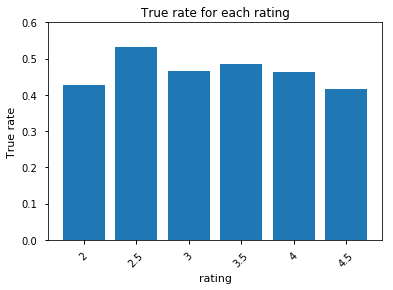

In [81]:
fig = plt.figure(figsize=(14,6))
barheights = ratios
barlabels = ['2', '2.5', '3', '3.5', '4', '4.5']
fig, ax = plt.subplots()
ax.bar(np.arange(len(barheights)), barheights)
x_pos = np.arange(len(barheights))
ax.set_xticks(x_pos)
ax.set_xticklabels(barlabels, rotation=45)
ax.set_title("True rate for each rating")
ax.set_ylim(0,0.6)
plt.xlabel('rating')
plt.ylabel('True rate')

# Price

In [116]:
# remove un-rated ones
mask2 = ((df4['price'] > 1.7) & (df4['price']< 1.8))
mask3 = ((df4['price'] > 5))
dfp5 = df4[~mask2]
dfp5 = dfp5[~mask3]
len(dfp5)

/home/soong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


1776

In [117]:
dfp5_grouped = dfp5.groupby('price')

In [118]:
prices = dfp5['price'].unique()
sorted(prices)

[1.0, 2.0, 3.0, 4.0]

In [119]:
prices = sorted(dfp5['price'].unique())
E = {}
for price in prices:
    E[price] = dfp5_grouped.get_group(price)['y_label']

In [120]:
# get ratio of (True/Total) for each rating
pratios = []
for price in prices:
    if len(E[price]) > 2:
        ratio = sum(E[price])/len(E[price])
        pratios.append(ratio)
pratios

[0.4574314574314574, 0.468682505399568, 0.4621212121212121, 0.56]

In [122]:
for price in prices:
    print('price: {} - number of restaurants: {}'.format(price,len(E[price])))

price: 1.0 - number of restaurants: 693
price: 2.0 - number of restaurants: 926
price: 3.0 - number of restaurants: 132
price: 4.0 - number of restaurants: 25


Text(0,0.5,'True rate')

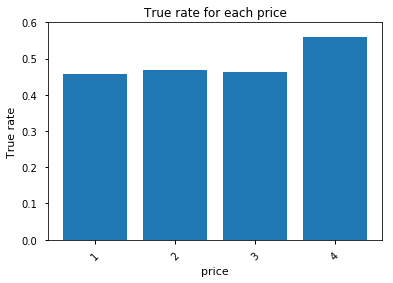

In [121]:
fig = plt.figure(figsize=(14,6))
barheights = pratios
barlabels = ['1', '2', '3', '4']
fig, ax = plt.subplots()
ax.bar(np.arange(len(barheights)), barheights)
x_pos = np.arange(len(barheights))
ax.set_xticks(x_pos)
ax.set_xticklabels(barlabels, rotation=45)
ax.set_title("True rate for each price")
ax.set_ylim(0,0.6)
plt.xlabel('price')
plt.ylabel('True rate')